<a id="CGAN"><h1>Import Header</h1></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/PhD/Development/code/Current/EVAGAN

Mounted at /content/drive
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN


In [2]:
# !pip install Adam
!pip install smote_variants

     |████████████████████████████████| 134 kB 4.1 MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=f6e653aed93dfde48621ade5c2f8ba2eb38b85baa667e33a9819b3496fb0f9df
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7452 sha256=76f9c1473538d12fa29936fe1e52acedd5e76fbc65b8ad042971dca87aaa9255
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [3]:
import importlib
import header

importlib.reload(header) # For reloading after making changes
from header import *

<a id="CGAN"><h1>Select GAN and Dataset and Flags</h1></a>

In [4]:
# GAN_type = 'GAN'
# GAN_type = 'CGAN'
# GAN_type = 'WGAN'
# GAN_type = 'WCGAN'
# GAN_type = 'EVAGAN'
GAN_type = 'ACGAN_CV'
# GAN_type = 'EVAGAN_CV'


DATA_SET = 'ISCX-2014'
# DATA_SET = 'CIC-2017'
# DATA_SET = 'CIC-2018'
# DATA_SET = 'UNSW_BotIoT'


# DATA_SET = 'Drebin'

# DATA_SET = 'Darknet'

<a id="GPU Settings"><h2>Set Flags</h2></a>

In [5]:
begin_from_start = 0
take_chunk = 0
required_epochs = 150

DISPLAY_FEATURES = 0
EVALUATION_PARAMETER = 'Accuracy'
SAVE_ONLY_BOT_DATA = 0
USE_KMEANS_FOR_CLASSIFICATION = 1

BALANCE_THE_DATASET = 1

labels =[]

USE_ONLY_TRAIN_SET = 1

USE_ALL_CLASSIFIERS = 0

ACCU_EVAL_TEST = 0
RCL_EVAL_TEST = 0

VISUAL_TEST_OVERLAPPING = 1

CSV_ONE_BOT = 0

VIEW_ALL_BOTS = 0

CTU_NERIS = 0

SINGLE_WEIGHT_CLASSIFIER_TEST_C2ST = 0
SINGLE_WEIGHT_CLASSIFIER_TEST_PROPOSED_METHODOLOGY = 0

C2ST_BLACK_BOX_TEST = 0
BOTSHOT_BLACK_BOX_TEST = 0

C2ST_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0
BOTSHOT_BLACK_BOX_TEST_AFTER_GAN_TRAINING = 0

GENERATE_OTHERS_DATA = 1

<a id="CGAN"><h1>Set Paths</h1></a>

In [6]:
MAIN_CODE_PATH = os.getcwd()

In [7]:
DATA_SET_PATH = MAIN_CODE_PATH + '/Dataset/' +  DATA_SET + '/'
CACHE_PATH = MAIN_CODE_PATH + '/cache/' + GAN_type + '/'
FIGS_PATH = MAIN_CODE_PATH  + '/figs/' + GAN_type + '/'

In [8]:
print(DATA_SET_PATH)
print(CACHE_PATH)
print(FIGS_PATH)

/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/Dataset/ISCX-2014/
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/cache/ACGAN_CV/
/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/figs/ACGAN_CV/


<a id="GPU Settings"><h2>Check Available GPUs</h2></a>

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


<a id="GPU Settings"><h2>Import Dataset</h2></a>

In [10]:
%cd $DATA_SET_PATH
!ls

/content/drive/My Drive/PhD/Development/code/Current/EVAGAN/Dataset/ISCX-2014
 __AUG_DATA_SET.csv
 best_losses.csv
 CGAN_0contour.eps
 CGAN_10contour.eps
 CGAN_2contour.eps
 CGAN_4contour.eps
 CGAN_6contour.eps
 CGAN_8contour.eps
 CGAN_data_frame_of_bots_0.csv
 CGAN_data_frame_of_bots_10.csv
 CGAN_data_frame_of_bots_2.csv
 CGAN_data_frame_of_bots_4.csv
 CGAN_data_frame_of_bots_6.csv
 CGAN_data_frame_of_bots_8.csv
 GAN_0contour.eps
 GAN_10contour.eps
 GAN_2contour.eps
 GAN_4contour.eps
 GAN_6contour.eps
 GAN_8contour.eps
 GAN_data_frame_of_bots_0.csv
 GAN_data_frame_of_bots_10.csv
 GAN_data_frame_of_bots_2.csv
 GAN_data_frame_of_bots_4.csv
 GAN_data_frame_of_bots_6.csv
 GAN_data_frame_of_bots_8.csv
 Husnain_GAN_AUG_DATA_SET.csv
 ISCX_Botnet-Testing.pcap_Flow.csv
'ISCX_Botnet-Testing.pcap_Flow.csv_(Preprocessed).csv'
'ISCX_Botnet-Testing.pcap_Flow.csv_VIRUT_(Preprocessed).csv'
 ISCX_Botnet-Training.pcap_Flow.csv
'ISCX_Botnet-Training.pcap_Flow.csv_(Preprocessed).csv'
'ISCX_Botnet-Trainin

In [11]:
if begin_from_start:        

    if DATA_SET == 'ISCX-2014':
        training_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv')
        testing_data = prepare_ISCX_2014_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'ISCX_Botnet-Testing.pcap_Flow.csv') 
    
    elif DATA_SET == 'CIC-2017':
        training_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
        testing_data = prepare_cic_2017_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'CIC_Friday_bot.csv')
        
    elif DATA_SET == 'CIC-2018':
        training_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
        testing_data = prepare_cic_2018_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
        
    elif DATA_SET == 'UNSW_BotIoT':
        training_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv')
        testing_data = prepare_UNSW_IoT(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv')
        
    elif DATA_SET == 'Darknet':
        training_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        testing_data = prepare_DARKNET_2020_data(PATH = DATA_SET_PATH, INPUT_FILE_NAME = r'Darknet.csv')
        
        

    print('Dataset preprocessed: ' + DATA_SET)
    
else:

    if DATA_SET == 'ISCX-2014':
        INPUT_TRAINING_FILE_NAME = r'ISCX_Botnet-Training.pcap_Flow.csv_VIRUT'
        INPUT_TESTING_FILE_NAME = r'ISCX_Botnet-Testing.pcap_Flow.csv_VIRUT'
        
    elif DATA_SET == 'CIC-2017':
        INPUT_TRAINING_FILE_NAME = r'CIC_Friday_bot.csv'
        INPUT_TESTING_FILE_NAME = r'CIC_Friday_bot.csv'
        
    elif DATA_SET == 'CIC-2018':
        INPUT_TRAINING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
        INPUT_TESTING_FILE_NAME = r'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'
        
    elif DATA_SET == 'BoT-IoT':
        INPUT_TRAINING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Training.csv'
        INPUT_TESTING_FILE_NAME = r'UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv'
        
    elif DATA_SET == 'Drebin':
        INPUT_TRAINING_FILE_NAME = r'Drebin_API_Dataset.csv'
        INPUT_TESTING_FILE_NAME = r'Drebin_API_Dataset.csv'
        
    elif DATA_SET == 'Darknet':
        INPUT_TRAINING_FILE_NAME = r'Darknet.csv'
        INPUT_TESTING_FILE_NAME = r'Darknet.csv'

    training_data = pd.read_csv (INPUT_TRAINING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    training_data= training_data.drop(['Unnamed: 0'], axis=1)
    
    testing_data = pd.read_csv (INPUT_TESTING_FILE_NAME + '_(Preprocessed).csv', low_memory=False)
    testing_data= testing_data.drop(['Unnamed: 0'], axis=1) 
    
    print('Dataset Imported: ' + DATA_SET)
    print('Training set: '+ str(training_data.shape))
    print('Testng set: '+ str(training_data.shape))
    


Dataset Imported: ISCX-2014
Training set: (248677, 61)
Testng set: (248677, 61)


In [12]:
training_data = training_data.replace([np.inf, -np.inf], np.nan).dropna(how="any").reset_index(drop=True)
print(training_data.describe())

       Flow Duration  Total Fwd Packet  ...      Idle Min          Label
count  248677.000000     248677.000000  ...  2.486770e+05  248677.000000
mean        0.113036          0.000844  ...  4.141199e-01       0.992971
std         0.252565          0.010604  ...  4.799477e-01       0.083545
min         0.000000          0.000000  ...  0.000000e+00       0.000000
25%         0.000005          0.000067  ...  0.000000e+00       1.000000
50%         0.004006          0.000133  ...  1.000000e-08       1.000000
75%         0.058283          0.000200  ...  9.715268e-01       1.000000
max         1.000000          1.000000  ...  1.000000e+00       1.000000

[8 rows x 61 columns]


<a id="GPU Settings"><h2>Display Features</h2></a>

In [13]:
if DISPLAY_FEATURES: 
    unified_df = training_data.copy()
    X_cols = unified_df.columns[:-1]
    y_cols = unified_df.columns[-1]



    axarr = [[]]*len(X_cols)
    columns = 4
    rows = int( np.ceil( len(X_cols) / columns ) )
    f, fig = plt.subplots( figsize=(columns*2.5, rows*2) )

    f.suptitle('Data Distributions by Feature and Label', size=16)

    for i, col in enumerate(X_cols[:]):
        axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )


        axarr[i].hist( unified_df.loc[ unified_df.Label == 0, col ] , label=['Normal'], color=('#009933'), alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].hist( unified_df.loc[ unified_df.Label == 1, col ] , label=['Real Bot'], color=['#FF0000'], alpha=0.5,
                              bins=np.linspace( np.percentile(unified_df[col],0), np.percentile(unified_df[col],100),50 ),
                              density=True )

        axarr[i].set_xlabel(col, size=12)
    #     axarr[i].set_ylim([0,1])
        axarr[i].tick_params(axis='both', labelsize=10)
        if i == 0: 
            legend = axarr[i].legend()
            legend.get_frame().set_facecolor('white')
        if i%4 != 0 : 
            axarr[i].tick_params(axis='y', left=True, labelleft=True)
        else:
            axarr[i].set_ylabel('Fraction',size=12)

    plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
    # plt.savefig('plots/Engineered_Data_Distributions.png')

    plt.show()
    
# else: 
#     print('Pair Plotting..')
# #     sns.pairplot(training_data, hue="Label")
    
#     sns.pairplot(training_data, vars=['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
#        'Total Length of Fwd Packet', 'Total Length of Bwd Packet'], hue="Label")
    
#     sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])

<a id="GPU Settings"><h2>Select Botnet</h2></a>

In [14]:
bots = training_data.loc[ training_data['Label']==0 ].copy()
normal = training_data.loc[ training_data['Label']==1 ].copy()

print('Normal before chunk: ' + str(normal.shape))    
print('Real Bots before chunk: ' + str(bots.shape)) 

if take_chunk:
    bots = bots[0:512]
    
print('Normal: ' + str(normal.shape))    
print('Real Bots: ' + str(bots.shape)) 

Normal before chunk: (246929, 61)
Real Bots before chunk: (1748, 61)
Normal: (246929, 61)
Real Bots: (1748, 61)


In [15]:
Train = training_data.copy()

In [16]:
bots_count =  pd.DataFrame( [ [np.sum(bots['Label']==i)] for i in np.unique(bots['Label']) ], columns=['count'], index=np.unique(bots['Label']) )

label_cols = [ i for i in bots.columns if 'Label' in i ]
data_cols = [ i for i in bots.columns if i not in label_cols ]

train_no_label = bots[ data_cols ].reset_index(drop=True)

print(bots_count['count'])

0    1748
Name: count, dtype: int64


In [17]:
train_data = bots

<a id="Classification"><h1>Classification</h1></a>

1748
CPU times: user 211 ms, sys: 106 ms, total: 317 ms
Wall time: 212 ms


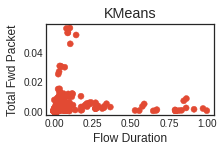

In [18]:
%%time 
# if GAN_type == 'CGAN' or GAN_type == 'WCGAN':
if USE_KMEANS_FOR_CLASSIFICATION:
    algorithms = [ 
    #     [ 'KMeans', cluster.KMeans, (), {'random_state':0} ],
        [ 'KMeans', cluster.KMeans, (), {'n_clusters':1, 'random_state':0} ],
    #     [ 'KMeans 3', cluster.KMeans, (), {'n_clusters':3, 'random_state':0} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {} ],
    #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {'linkage': 'ward', 'n_clusters': 3} ],
    #     [ 'Agg. Ave 3', cluster.AgglomerativeClustering, (), {'linkage': 'average', 'n_clusters': 3} ],
    #     [ 'Agg. Complete 3', cluster.AgglomerativeClustering, (), {'linkage': 'complete', 'n_clusters': 3} ],
    #     [ 'DBSCAN', cluster.DBSCAN, (), {'eps':0.025} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {} ],
    #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':1, } ],
    #     [ 'HDBSCAN 2 10', hdbscan.HDBSCAN, (), {'min_cluster_size':2, 'min_samples':10, } ],
    #     [ 'HDBSCAN 10 10 ', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':10, } ],
    ]

    rows = len(algorithms)
    columns = 1
    fig, ax = plt.subplots(3, 2, figsize=(3, 2),
                            constrained_layout=True)

    for i, [name, algorithm, args, kwds] in enumerate(algorithms):

        labels = algorithm(*args, **kwds).fit_predict(train_no_label)
        print(len(labels))
        colors = np.clip(labels,-1,9)
        colors = [ 'C'+str(i) if i>-1 else 'white' for i in colors ]

        plt.subplot(rows,columns,i*columns+1)
        plt.scatter(train_no_label[data_cols[0]], train_no_label[data_cols[1]], c=colors)
        plt.xlabel(data_cols[0]), plt.ylabel(data_cols[1])
        plt.title(name)
            

#     else:
#         labels = train_bots_only['Label'].values.tolist() 
#         sns.set(style="ticks", color_codes=True) # Remove background and grid

#     #     g = sns.scatterplot(data_cols[0],data_cols[1], data=train, hue=labels)

#     #     plt.show() 


#         plt.figure()
#         ax = sns.countplot(y="Label", data=train_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 2700 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Trainset.pdf', dpi=600)
#         plt.show()




#         plt.figure(figsize=(6, 6))
#         ax = sns.countplot(y="Label", data=test_bots_only) # for Seaborn version 0.7 and more
#         for p in ax.patches:
#             ax.text(p.get_y() + p.get_width() + 6000 , p.get_y()+p.get_height()-0.1, p.get_width(), ha="center") 

#         ax.set_ylabel('Botnets')

#         plt.savefig('Botnet-Testset.pdf', dpi=600)
#         plt.show()

#     #     g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count", height=4, aspect=.7);


#     #     sns.pairplot(data=train, vars=[data_cols[0], data_cols[1]], hue='Label')


#     # plt.grid(False)
#     # plt.show()
#     print(train_no_label.describe())
    
    botnet_w_classes = train_no_label.copy()
    botnet_w_classes['Label'] = labels

#     print(botnet_w_classes.describe())
    train_data = botnet_w_classes
    
# else:
#     train_data = train_no_label


In [19]:
train_data['Label']

0       0
1       0
2       0
3       0
4       0
       ..
1743    0
1744    0
1745    0
1746    0
1747    0
Name: Label, Length: 1748, dtype: int32

<a id="GPU Settings"><h2>GAN Training</h2></a>

Result: (1760, 61)
log_interval : 55
Total Batch Iterations: 8250
['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd By

FileNotFoundError: ignored

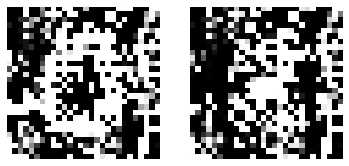

In [ ]:
# import header
# import importlib
# importlib.reload(header) # For reloading after making changes
# from header import *


gpu_device = '/device:GPU:1'
physical_devices = tf.config.list_physical_devices('GPU') 
for gpu_instance in physical_devices: 
    tf.config.experimental.set_memory_growth(gpu_instance, True)

#----------------------------------
# Set neurons and batch size
#----------------------------------
base_n_count = 32
batch_size =  32

#----------------------------------


result = train_data

remaining = train_data.shape[0] % batch_size

if remaining > 0:
    if remaining < train_data.shape[0]:
        additional = batch_size - remaining
        _additional = train_data.loc[train_data.shape[0]-additional:train_data.shape[0],: ]  
        
        frames = [train_data, _additional]
        result = pd.concat(frames).reset_index(drop=True)

print('Result: ' + str(result.shape))
# ---------------------------------
nb_steps = required_epochs * result.shape[0] // batch_size

log_interval = result.shape[0] // batch_size # We are setting this as an epoch. This depends on data size.

print("log_interval : " + str(log_interval))

# nb_steps = TRAINING_ITERATIONS  # 50000 # Add one for logging of the last interval
print("Total Batch Iterations: " + str(nb_steps))
rand_noise_dim = 100 


k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step

critic_pre_train_steps = 100# 100  # number of steps to pre-train the critic before starting adversarial training

generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True 
train = result#.copy().reset_index(drop=True) # botnet only with labels from classification



label_cols = [ i for i in train.columns if 'Label' in i ]

data_cols = [ i for i in train.columns if i not in label_cols ]

print(data_cols)

train_no_label = train[ data_cols ]

train_no_label = round(train_no_label, 4)

# if SAVE_ONLY_BOT_DATA:
#     train_no_label.to_csv(str(DATA_SET_PATH) + 'ONLY_BOTNET_DATA_(Preprocessed).csv')
#     print('File: ' + 'ONLY_BOTNET_DATA_(Preprocessed).csv saved to directory')   



test_size = train.shape[0] 
learning_rate = 5e-4

for X in range(1):
    TODAY = DATA_SET + '_' + str(datetime.datetime.now()) 

    print(TODAY)

    Test = testing_data.copy()

    arguments = [rand_noise_dim, nb_steps, batch_size, 
                k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
                CACHE_PATH, FIGS_PATH, show, test_size, gpu_device, EVALUATION_PARAMETER, TODAY ]

    if GAN_type == 'GAN':
        best_losses = adversarial_training_GAN(arguments, train_no_label, data_cols) # GAN    
    elif GAN_type == 'CGAN':    
        best_losses = adversarial_training_CGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN      
    elif GAN_type == 'WGAN':
        best_losses = adversarial_training_WGAN(arguments, train_no_label, data_cols) # WGAN    
    elif GAN_type == 'WCGAN':    
        best_losses = adversarial_training_WCGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN      


    # if GAN_type == 'WGAN':
    #     best_losses = train_WGAN(arguments, train_no_label, data_cols)

    # elif GAN_type == 'GAN':
    #     best_losses = train_GAN(arguments, train_no_label, data_cols)


    elif GAN_type == 'EVAGAN':   

        best_losses = train_EVAGAN(arguments, train, Train, Test, data_cols)

    elif GAN_type == 'EVAGAN_CV':   

        best_losses = train_EVAGAN_CV(arguments, train, Train, Test, data_cols)



    elif GAN_type == 'ACGAN_CC':   

        best_losses = train_ACGAN_CC(arguments, train, Train, Test, data_cols)

    elif GAN_type == 'ACGAN_CV':   

        best_losses = train_ACGAN_CV(arguments, train, Train, Test, data_cols)




In [ ]:
# %cd '/home/riz/Insync/rhr407@gmail.com/Google_Drive/PhD/Development/code/Current/Paper_2(v7)/figs/full/GAN/'
# !ls